In [1]:
'''
Author: Anmol Kachroo

'''

'\nAuthor: Anmol Kachroo\n\n'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [57]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from subprocess import call

In [58]:
# loading dataset
main_data = datasets.load_iris()

In [59]:
# printing the names
print("Features:", main_data.feature_names, sep="\n")

# printing the label type of wine(class_0, class_1, class_2)
print("\nLabels:", main_data.target_names)

# print data(feature)shape
print("features in the dataset are:", main_data.data.shape)

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']
features in the dataset are: (150, 4)


In [60]:
#split data set into train and test sets
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(main_data.data, main_data.target, test_size = 0.3, random_state = 53)

In [61]:
x_train

array([[5. , 2. , 3.5, 1. ],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3. , 4.8, 1.8],
       [4.4, 3.2, 1.3, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.9, 3.1, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6. , 2.2, 4. , 1. ],
       [5.1, 2.5, 3. , 1.1],
       [5.2, 4.1, 1.5, 0.1],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [5.4, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.4, 1.5, 0.2],
       [7.2, 3

In [62]:
y_test

array([0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2,
       1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2])

In [63]:
#Create a Decision Tree Classifier (using Gini)
dtc = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
# Predict the classes of test data
pred = dtc.predict(x_test)
print("prediction:",pred)

prediction: [0 0 2 1 1 2 2 0 1 2 0 1 2 0 2 1 1 2 2 0 2 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1 1 2 2 0 1 2 2]


In [65]:
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:",Accuracy)

Accuracy: 0.9555555555555556


In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.89      0.94        18\n           2       0.89      1.00      0.94        16\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

Confusion matrix:
[[11  0  0]
 [ 0 16  2]
 [ 0  0 16]]


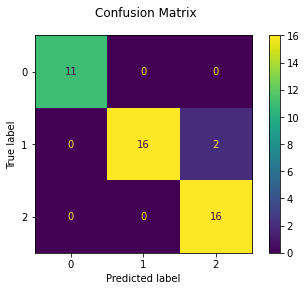

In [67]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [68]:
export_graphviz(dtc,out_file='iris_tree.dot',feature_names = list(main_data.feature_names),
               class_names=list(main_data.target_names), filled = True)

# Convert to png
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

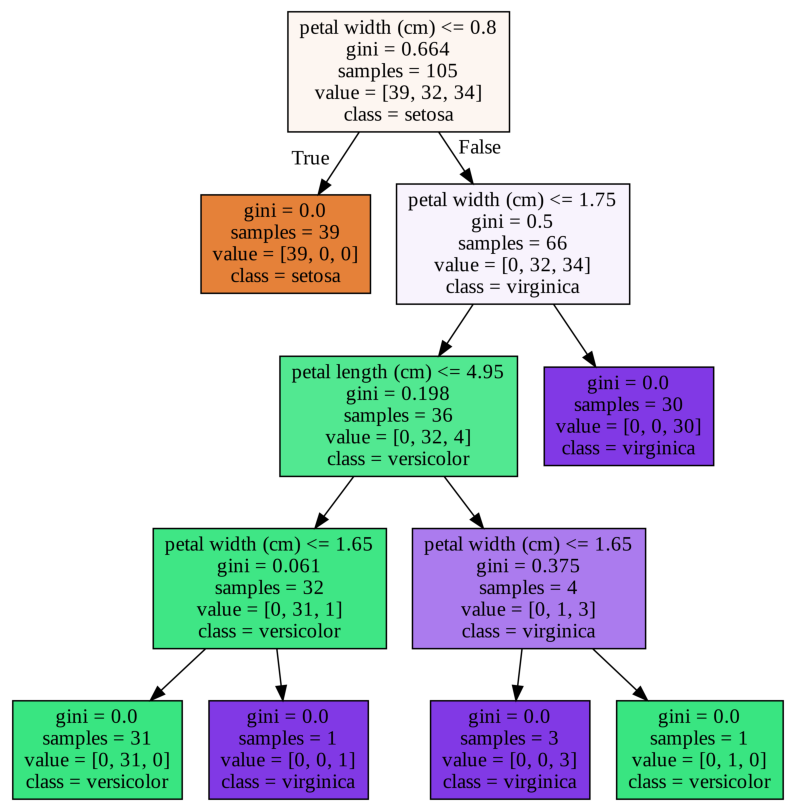

In [69]:
# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()